In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder




In [2]:
df = pd.read_csv('logbook_assignment1.csv')
# let's print out how many entries there are in the dataset
print(len(df))

1174870


C:\Users\mayur\AppData\Local\Temp\ipykernel_26304\4187553749.py:1: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('logbook_assignment1.csv')


In [3]:
print(df)

                                               date_fueled date_captured  \
0        Cooling System, Heating System, Lights, Spark ...    Apr 7 2022   
1                                               Nov 7 2012   Aug 30 2016   
2                                              Sep 22 2012   Sep 28 2012   
3                                               May 4 2019    May 4 2019   
4                                              Feb 15 2022   Feb 15 2022   
...                                                    ...           ...   
1174865                                        Feb 19 2020   Feb 19 2020   
1174866                                         Dec 6 2019    Dec 6 2019   
1174867                                         Oct 4 2021    Oct 4 2021   
1174868                                        Jul 26 2021   Jul 26 2021   
1174869                                        Mar 12 2019   Mar 12 2019   

         odometer gallons cost_per_gallon total_spent   mpg    miles  \
0         73,37

# Question 1

## 1.1 Date Fields

In [4]:

pattern = r'^[A-Z][a-z]{2} \d{1,2} \d{4}$'
date_fuel = df['date_fueled'].str.match(pattern)
percentage = (date_fuel.sum() / len(df)) * 100
proportion = 100-percentage
print(f"1. {proportion:.2f}% of rows don't match the correct date format.")

1. 11.68% of rows don't match the correct date format.


In [5]:
#Filling in dates as proxy
valid_fueled = df['date_fueled'].astype(str).str.match(pattern)
valid_capture = df['date_captured'].astype(str).str.match(pattern)

df.loc[~valid_fueled & valid_capture, 'date_fueled'] = df['date_captured']
print("2. The dates filled in as a proxy")
df.head()

2. The dates filled in as a proxy


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,Apr 7 2022,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [6]:

df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df.loc[~df['date_fueled'].dt.year.between(1900, 2099), 'date_fueled'] = pd.NaT
df['date_captured'] = pd.to_datetime(df['date_captured'], errors='coerce')
df.loc[~df['date_captured'].dt.year.between(1900, 2099), 'date_captured'] = pd.NaT
print("3. Converting the column to a date format, setting any invalid date fueled entries")
df.head()

3. Converting the column to a date format, setting any invalid date fueled entries


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,2022-04-07,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,2016-08-30,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,2012-09-28,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,2019-05-04,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [7]:
#Removing dates before 2005, and dates in the future relative to 1 Septemeber 2025
min_date = pd.Timestamp("2005-01-01")
max_date = pd.Timestamp("2025-09-01")
mask = (df['date_fueled'] >= min_date) & (df['date_fueled'] <= max_date)
df = df.loc[mask]

print("4. Removed dates that are in the future relative to 1st September 2025 and before 2005")
df.head()

4. Removed dates that are in the future relative to 1st September 2025 and before 2005


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,2022-04-07,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,2016-08-30,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,2012-09-28,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,2019-05-04,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


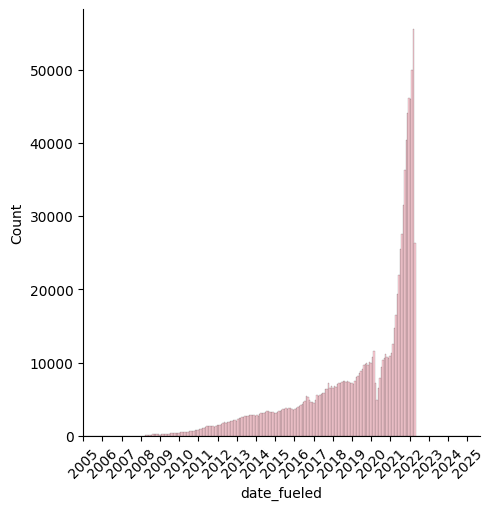

5. Plotting the distribution of fueling dates: 


In [8]:
g = sns.displot(df, x="date_fueled", color="pink")

g.set(xlim=(pd.Timestamp("2005-01-01"), pd.Timestamp("2025-09-01")))
g.ax.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1))   # every year
g.ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.show()
print("5. Plotting the distribution of fueling dates: ")

## 1.2 Numeric Fields

In [9]:
#1.2-1
gallons_null_count = df['gallons'].isnull().sum()
gal_per = (gallons_null_count / len(df)) * 100
print(f"The percentage of missing gallons values is {gal_per:.2f}%")

miles_count = df['miles'].isnull().sum()
miles_per = (miles_count / len(df)) * 100
print(f"The percentage of missing miles values is {miles_per:.2f}%")

odometer_count = df['odometer'].isnull().sum()
odometer_per = (odometer_count/ len(df)) * 100
print(f"The percentage of missing odometer values is {odometer_per:.2f}%")



The percentage of missing gallons values is 6.32%
The percentage of missing miles values is 87.55%
The percentage of missing odometer values is 12.69%


In [10]:
#converting everything to a float
print("3. Converting the numerical values to floats, after removing the commas: ")
df['gallons'] = df['gallons'].str.replace(",", '').astype(float)
df['mpg']= df['mpg'].str.replace(",", '').astype(float)
df['miles'] = df['miles'].str.replace(",", '').astype(float)
df['odometer'] = df['odometer'].str.replace(",", '').astype(float)



3. Converting the numerical values to floats, after removing the commas: 


In [11]:
print("2. Calculations of the other interdependant columns")

df = df.dropna(subset=['miles', 'gallons', 'mpg'], thresh=2)
df = df.dropna(subset = ['odometer'])
df['miles'] = df['gallons']*df['mpg']
df['gallons'] = df['miles']/df['mpg']
df['mpg'] = df['miles']/df['gallons']

df.head()

2. Calculations of the other interdependant columns


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233
5,2021-10-23,2021-10-23,147567.0,3.413,$3.739,$12.76,29.0,98.9770,https://www.somewebsite.com/volkswagen/passat/...
6,2021-11-20,2021-12-12,105929.0,9.044,$4.639,$41.96,29.5,266.7980,https://www.somewebsite.com/mazda/3_sport/2010...


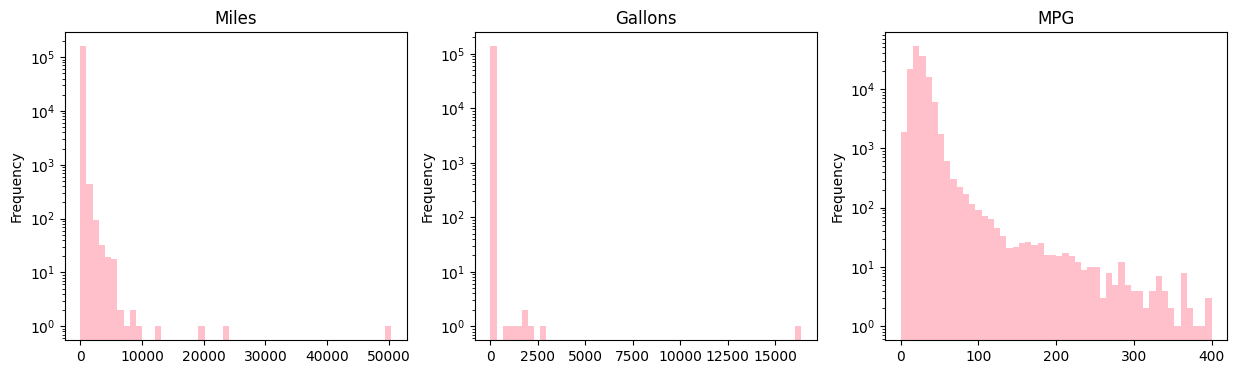

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

df['miles'].plot(kind='hist', bins=50, ax=axes[0], title='Miles', log=True, color='pink')
df['gallons'].plot(kind='hist', bins=50, ax=axes[1], title='Gallons',log=True, color='pink')
df['mpg'].plot(kind='hist', bins=50, ax=axes[2], title='MPG', log=True, color='pink')

plt.show()


In [13]:
df.describe()

,date_fueled,date_captured,odometer,gallons,mpg,miles
count,159572,159572,1.595720e+05,137252.000000,137250.000000,159572.000000
mean,2019-09-04 09:07:40.501842176,2019-12-07 12:57:38.230767616,1.021719e+05,13.033909,25.233530,259.388320
min,2005-01-05 00:00:00,2008-08-08 00:00:00,0.000000e+00,0.000000,0.100000,0.000000
25%,2018-03-17 00:00:00,2018-06-24 00:00:00,4.460200e+04,9.518000,18.000000,171.848400
50%,2020-10-30 00:00:00,2020-12-04 00:00:00,9.057350e+04,12.318000,23.000000,263.117300
75%,2021-11-10 00:00:00,2021-11-15 00:00:00,1.458910e+05,15.156000,29.500000,338.869125
max,2024-12-07 00:00:00,2022-04-16 00:00:00,3.861013e+06,16378.667000,399.900000,50356.800000
std,NaN,NaN,7.623799e+04,46.388214,14.653482,246.065979


In [14]:

df.describe(include=['O'], exclude=None)


,cost_per_gallon,total_spent,user_url
count,158901,159572,159572
unique,19351,49537,77221
top,$2.999,$20.00,https://www.somewebsite.com/mazda/5/2008/390318
freq,2236,882,10


# Question 2

In [15]:
# 2.1
def extract_currency(value):
    if pd.isnull(value):
        return None
    match = re.match(r"^([^\d.]+)", str(value))  
    return match.group(1).strip() if match else None

df["currency"] = df["total_spent"].apply(extract_currency)

In [16]:
# 2.2

def to_float(value):
    if pd.isnull(value):
        return None
    cleaned = re.sub(r"[^\d.]", "", str(value))  # keep only numbers and dot
    try:
        return float(cleaned)
    except ValueError:
        return None

df["total_spent_float"] = df["total_spent"].apply(to_float)
df["cost_per_gallon_float"] = df["cost_per_gallon"].apply(to_float)

In [17]:
# 2.3

def parse_user_url(url):
    try:
        parts = url.strip("/").split("/")
        user_id = parts[-1]
        if len(parts) >= 4:
            car_make = parts[3].capitalize()
            car_model = parts[4].upper()
            car_year = int(parts[5]) if parts[5].isdigit() else None
        else:
            car_make, car_model, car_year = None, None, None
        
        return pd.Series([car_make, car_model, car_year, user_id])
    
    except IndexError:
        return pd.Series([None, None, None, None])
    
df[["car_make", "car_model", "car_year", "user_id"]] = df["user_url"].apply(parse_user_url)
print(df[["car_make", "car_model", "car_year", "user_id"]])

             car_make   car_model  car_year user_id
1                 Bmw          X3    2009.0  461150
2       Mercedes-benz        E300    1998.0  133501
3                 Bmw        320D    2010.0  247233
5          Volkswagen      PASSAT    2004.0  445811
6               Mazda     3_SPORT    2010.0  529810
...               ...         ...       ...     ...
983033     Volkswagen         GTI    2016.0  418084
983035  Mercedes-benz       ML350    2011.0  651005
983036           Audi  A6_QUATTRO    2000.0  277855
983038           Fiat       DOBLO    2003.0  900898
983039  Mercedes-benz   CLA45_AMG    2015.0  865807

[159572 rows x 4 columns]


In [18]:
# 2.4 

df["litres_filled"] = pd.to_numeric(df["gallons"], errors="coerce") * 3.78541
df["km_driven"] = pd.to_numeric(df["miles"], errors="coerce") * 1.60934
df["litres_per_100km"] = (df["litres_filled"] / df["km_driven"]) * 100

In [19]:
print(df[[
    "currency", "total_spent_float", "cost_per_gallon_float",
    "car_make", "car_model", "car_year", "user_id",
    "litres_filled", "km_driven", "litres_per_100km"
]].head())

  currency  total_spent_float  cost_per_gallon_float       car_make car_model  \
1        $              67.86                  5.599            Bmw        X3   
2        £              43.53                  5.450  Mercedes-benz      E300   
3        £              54.00                  5.110            Bmw      320D   
5        $              12.76                  3.739     Volkswagen    PASSAT   
6        $              41.96                  4.639          Mazda   3_SPORT   

   car_year user_id  litres_filled   km_driven  litres_per_100km  
1    2009.0  461150      45.879169  616.364345          7.443514  
2    1998.0  133501      30.249211  366.516724          8.253160  
3    2010.0  247233      40.030711  796.478459          5.025963  
5    2004.0  445811      12.919604  159.287645          8.110864  
6    2010.0  529810      34.235248  429.368693          7.973392  


# Question 3

##### 3.1

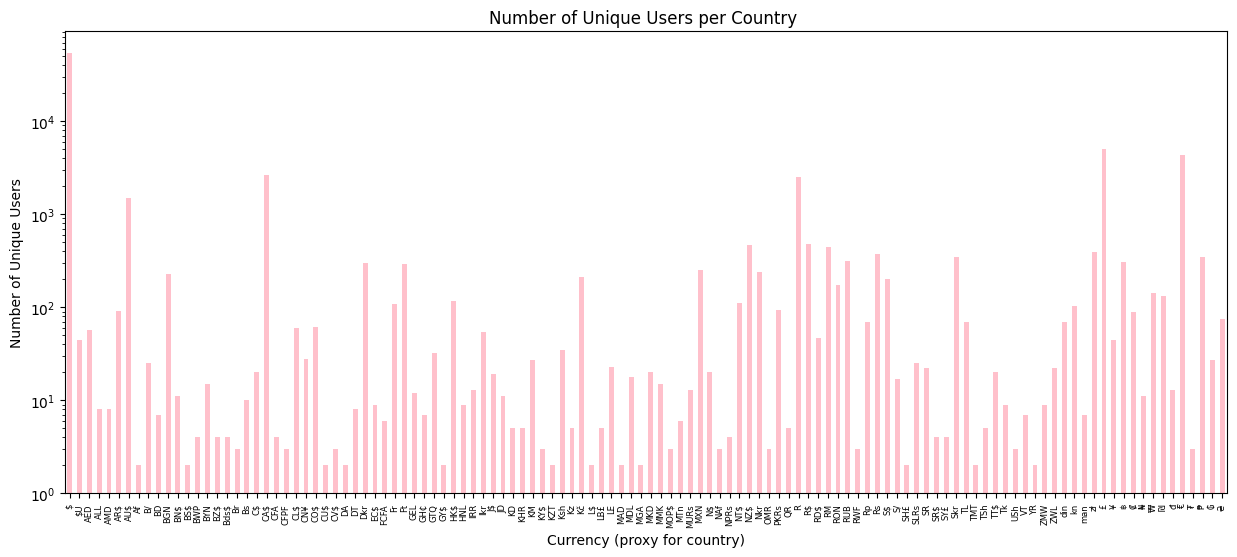

In [20]:
#print (df["currency"].unique())
unique_users = df.groupby('currency')['user_id'].nunique()

fig, ax = plt.subplots(figsize=(15,6))
unique_users.plot(kind='bar', ax=ax, color='pink', log=True) 

ax.set_xlabel("Currency (proxy for country)")
ax.set_ylabel("Number of Unique Users")
ax.set_title("Number of Unique Users per Country ")
ax.tick_params(axis='x', labelsize=6)

plt.show()

##### 3.2

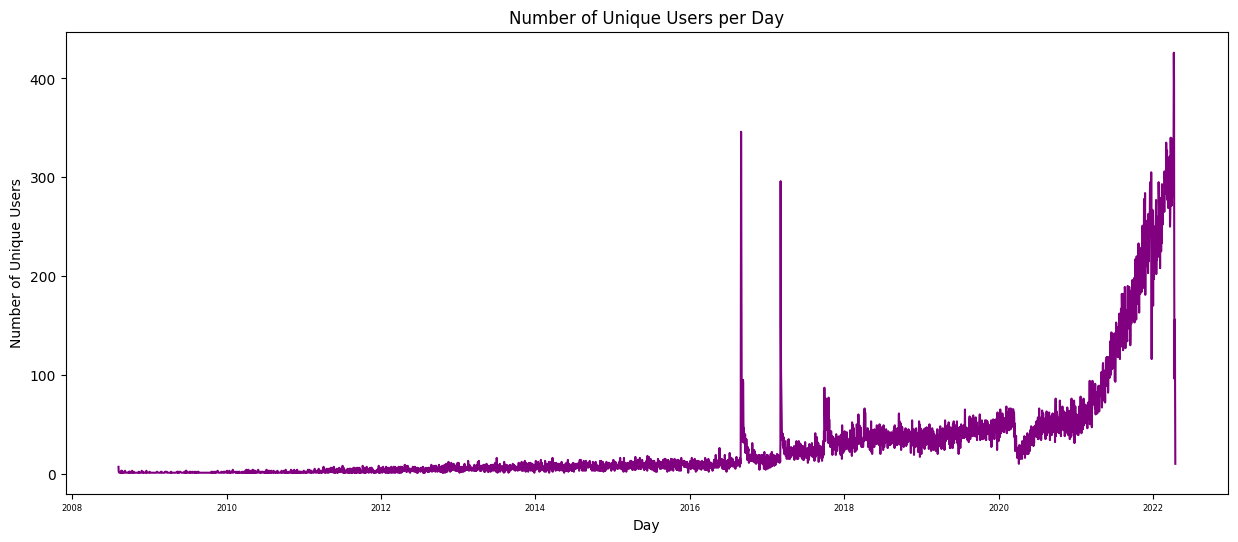

In [21]:
df['date_captured']=pd.to_datetime(df['date_captured'])
df['day']=df['date_captured'].dt.date

unique_user_by_day= df.groupby('day')['user_id'].nunique()

fig, ax = plt.subplots(figsize=(15,6))
unique_user_by_day.plot(kind='line', title= "Number of Unique Users per Day", color='purple')

ax.set_xlabel("Day")
ax.set_ylabel("Number of Unique Users")
ax.tick_params(axis='x', labelsize=6)

plt.show()

##### 3.3

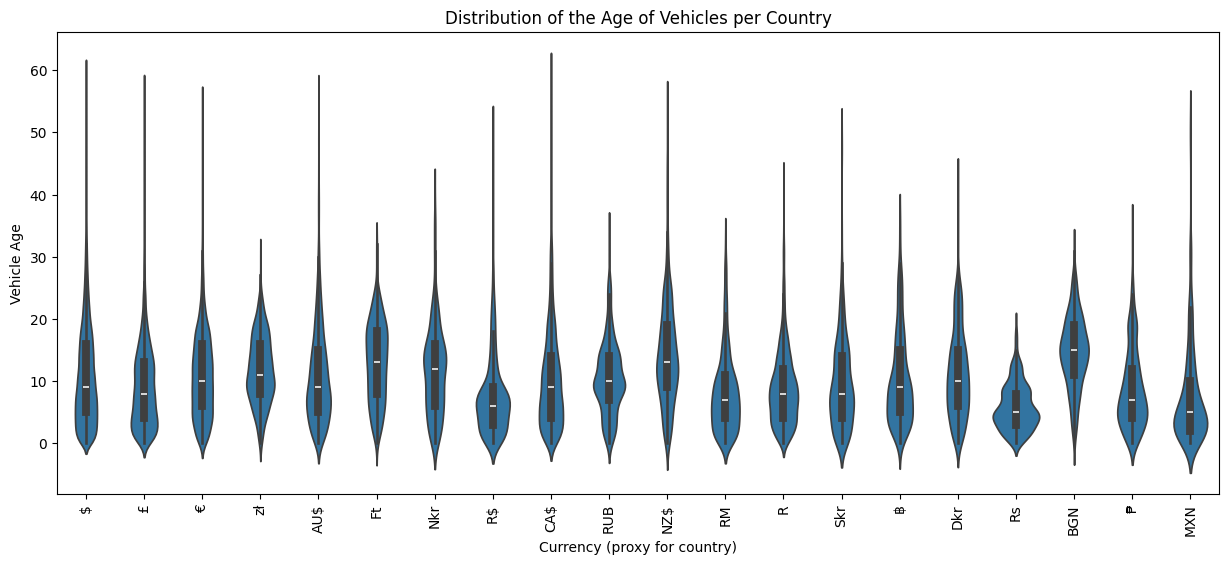

In [22]:

df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df['year_fueled'] = df['date_fueled'].dt.year
df['age'] = df['year_fueled'] - df['car_year']
#print(df[['car_year', "year_fueled", 'age']])
top_currencies = df['currency'].value_counts().head(20).index
df_top = df[df['currency'].isin(top_currencies)]
df_top = df_top[(df_top['age'] >= 0) & (df_top['age'] <= 60)]


plt.figure(figsize=(15,6))
sns.violinplot(x='currency', y='age', data=df_top)
plt.xticks(rotation=90)
plt.xlabel('Currency (proxy for country)')
plt.ylabel('Vehicle Age')
plt.title('Distribution of the Age of Vehicles per Country')
plt.show()

##### 3.4

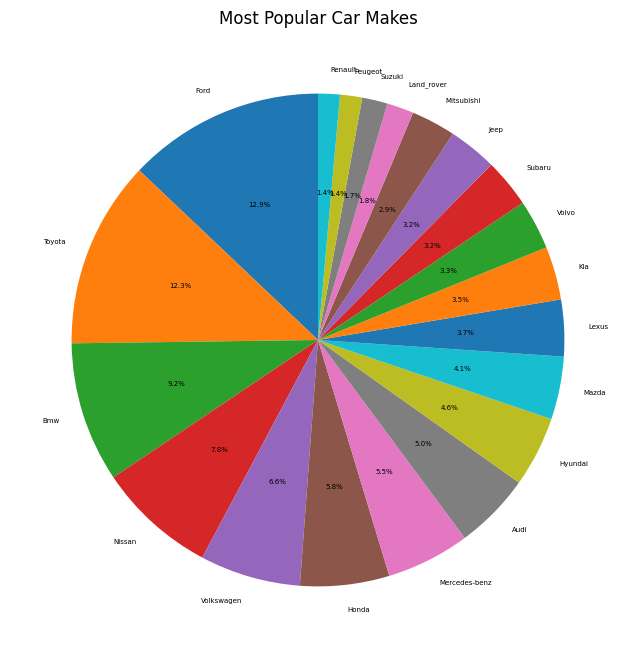

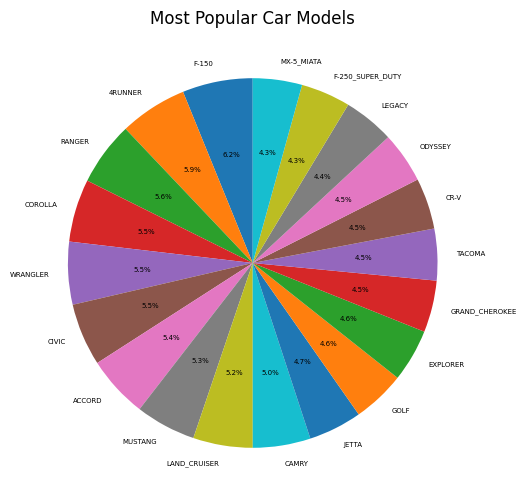

In [23]:
car_makes = df['car_make'].value_counts()
top_50_car_makes = car_makes.nlargest(20)

top_50_car_makes.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), textprops={'fontsize': 5})
plt.title('Most Popular Car Makes')
plt.ylabel('') 
plt.show()

car_models = df['car_model'].value_counts()
#print(car_models)
top_50_car_models = car_models.nlargest(20)

top_50_car_models.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6), textprops={'fontsize': 5})
plt.title('Most Popular Car Models')
plt.ylabel('') 
plt.show()



# Question 4

## 4.1 Outlier Removal

In [24]:
#find the number of transactions for each currency and then report the top 5
top_currencies = []
array = df['currency'].value_counts(dropna=True)
top_currencies.append(array[0:5])
print(f"The top 5 currencies, are from America, United Kingdom, Canada, Europe and South Africa given by: {top_currencies} ")

The top 5 currencies, are from America, United Kingdom, Canada, Europe and South Africa given by: [currency
$      111617
£        9909
€        8733
CA$      5507
R        5236
Name: count, dtype: int64] 


In [25]:
top_currencies = ["$", "£", "CA$", "€", "R"]
variables = ['total_spent_float', 'gallons', 'cost_per_gallon_float', 'mpg', 'miles']

thresholds = {}
for curr in top_currencies:
    thresholds[curr] = {}
    subset = df[df['currency'] == curr]
    for col in variables:
        q = subset[col].quantile([0.01, 0.99])
        thresholds[curr][col] = (max(0, q[0.01]), q[0.99])


cleaned_dfs = {}
summary_stats = {}

for curr in top_currencies:
    subset = df[df['currency'] == curr].copy()
    t = thresholds[curr]

    subset = subset[
        (subset['total_spent_float'].between(*t['total_spent_float'])) &
        (subset['gallons'].between(*t['gallons'])) &
        (subset['cost_per_gallon_float'].between(*t['cost_per_gallon_float'])) &
        (subset['mpg'].between(*t['mpg'])) &
        (subset['miles'].between(*t['miles']))
    ]
    
    cleaned_dfs[curr] = subset

    stats_before = df[df['currency']==curr][variables].describe()
    stats_after = subset[variables].describe()
    summary_stats[curr] = {'before': stats_before, 'after': stats_after}

cols = variables
for curr in top_currencies:
    original_count = len(df[df['currency'] == curr])
    cleaned_count = len(cleaned_dfs[curr])
    removed_count = original_count - cleaned_count
    print(f"\n=== {curr} ===")
    stats_before = df[df['currency']==curr][cols].agg(['count', 'mean', 'min', 'max'])
    stats_after = cleaned_dfs[curr][cols].agg(['count', 'mean', 'min', 'max'])
    print("Before Cleaning:")
    print(stats_before.T)
    print("After Cleaning:")
    print(stats_after.T)

    


=== $ ===
Before Cleaning:
                          count        mean  min          max
total_spent_float      111617.0  467.049052  0.0  2000001.190
gallons                 97483.0   13.452456  0.0    16378.667
cost_per_gallon_float  111372.0   46.097681  0.0   132489.412
mpg                     97482.0   23.629590  0.1      399.900
miles                  111617.0  253.376759  0.0    50356.800
After Cleaning:
                         count        mean     min       max
total_spent_float      91737.0   72.136512   6.800  2204.530
gallons                91737.0   12.962539   3.758    31.094
cost_per_gallon_float  91737.0    5.914061   1.499   247.566
mpg                    91737.0   22.828279   7.300    60.200
miles                  91737.0  280.853230  30.420   665.708

=== £ ===
Before Cleaning:
                        count        mean    min          max
total_spent_float      9909.0  109.916250  0.000  105000.0000
gallons                8398.0   11.743981  0.759      70.3990
cost

In [26]:
print("3. Showing how many rows were removed after accounting for outliers")
top_currencies = ["$", "£", "CA$", "€", "R"]

for curr in top_currencies:
    original_count = len(df[df['currency'] == curr])
    cleaned_count = len(cleaned_dfs[curr])
    removed_count = original_count - cleaned_count
    print(f"{curr}: {removed_count} rows removed ({removed_count/original_count:.2%})")


3. Showing how many rows were removed after accounting for outliers
$: 19880 rows removed (17.81%)
£: 2009 rows removed (20.27%)
CA$: 973 rows removed (17.67%)
€: 2202 rows removed (25.21%)
R: 1255 rows removed (23.97%)


## 4.2 Fuel Efficiency

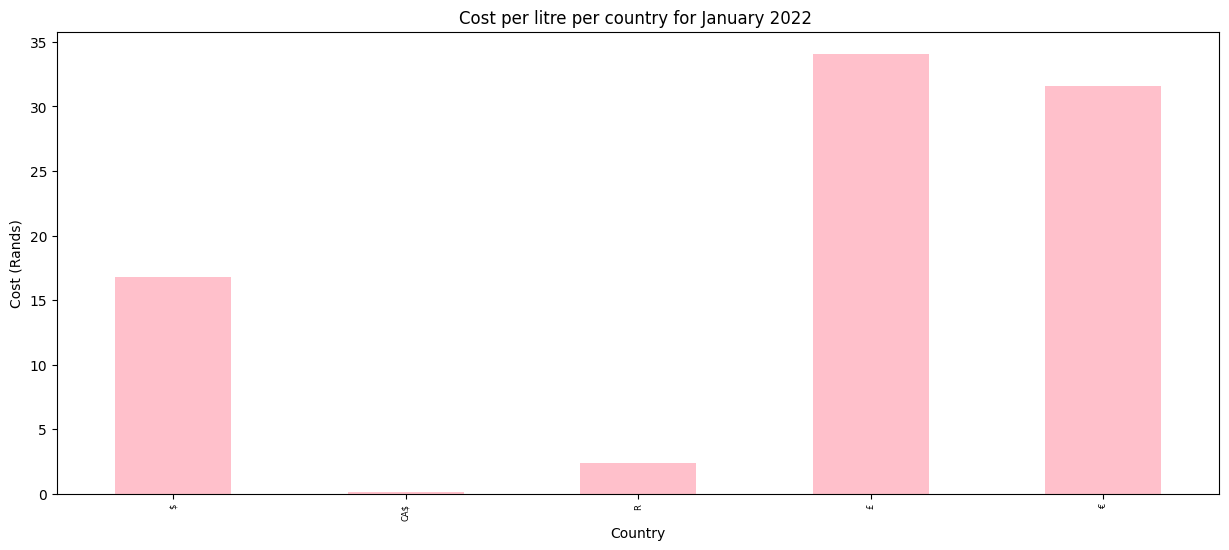

In [27]:
#4.2.1
#source for exchnage rates: https://personal.nedbank.co.za/bank/international-banking/forex-rates.html
top_currencies = ["$", "£", "CA$", "€", "R"]

exchange_rates= {
    '$': 17.27,   
    '£': 23.11,  
    'CA$': 0.08, 
    '€': 19.93,   
    'R': 1.0     
}

df['currency']= df['cost_per_gallon'].str.extract(r'(CA\$|£|\$|€|R)')[0]
df['cost_per_gallon_rand']=df['cost_per_gallon_float']* df['currency'].map(exchange_rates)
df['cost_per_liter_rand']=df['cost_per_gallon_rand']/3.78541

jan_2022 = df[(df['date_fueled'].dt.year == 2022) & (df['date_fueled'].dt.month == 1)]

jan_2022_top = jan_2022[jan_2022['currency'].isin(top_currencies)]
jan_2022_clean = jan_2022_top[(jan_2022_top['cost_per_gallon_float'] <= 20) & (jan_2022_top['cost_per_liter_rand'] < 100)]
comp_fuel_prices = jan_2022_clean.groupby('currency')['cost_per_liter_rand'].mean()

fig, ax = plt.subplots(figsize=(15,6))
comp_fuel_prices.plot(kind='bar', ax=ax, color='pink') 

ax.set_xlabel("Country")
ax.set_ylabel("Cost (Rands)")
ax.set_title("Cost per litre per country for January 2022 ")
ax.tick_params(axis='x', labelsize=6)

plt.show()




In [28]:
#4.4.2

average_miles_per_tank = df['miles'].mean()
print(f"\n Average miles driven per tank: {average_miles_per_tank}")

user_counts = df['user_id'].value_counts()
repeated_users = user_counts[user_counts > 1].index
df_repeated = df[df['user_id'].isin(repeated_users)].copy()

df_repeated['odometer'] = pd.to_numeric(df_repeated['odometer'], errors='coerce')
df_repeated = df_repeated.dropna(subset=['odometer'])
df_repeated = df_repeated.sort_values(['user_id', 'date_fueled'])

df_repeated['prev_odometer'] = df_repeated.groupby('user_id')['odometer'].shift(1)
df_repeated['odometer_diff'] = df_repeated['odometer'] - df_repeated['prev_odometer']

#if difference in odometer reading is higher than average distance driven per tank, possibly missing log.
distance_threshold = 265
print(f"\nUsing distance threshold: {distance_threshold} miles")

df_repeated['missing_fillup'] = (
    (df_repeated['odometer_diff'] > distance_threshold) &
    (df_repeated['odometer_diff'] > 0) 
)

potential_missing_logs = df_repeated[df_repeated['missing_fillup']]

print(f"\nEstimated number of users that missed logging a fill-up: {potential_missing_logs.shape[0]}")



 Average miles driven per tank: 259.3883203030607

Using distance threshold: 265 miles

Estimated number of users that missed logging a fill-up: 76192


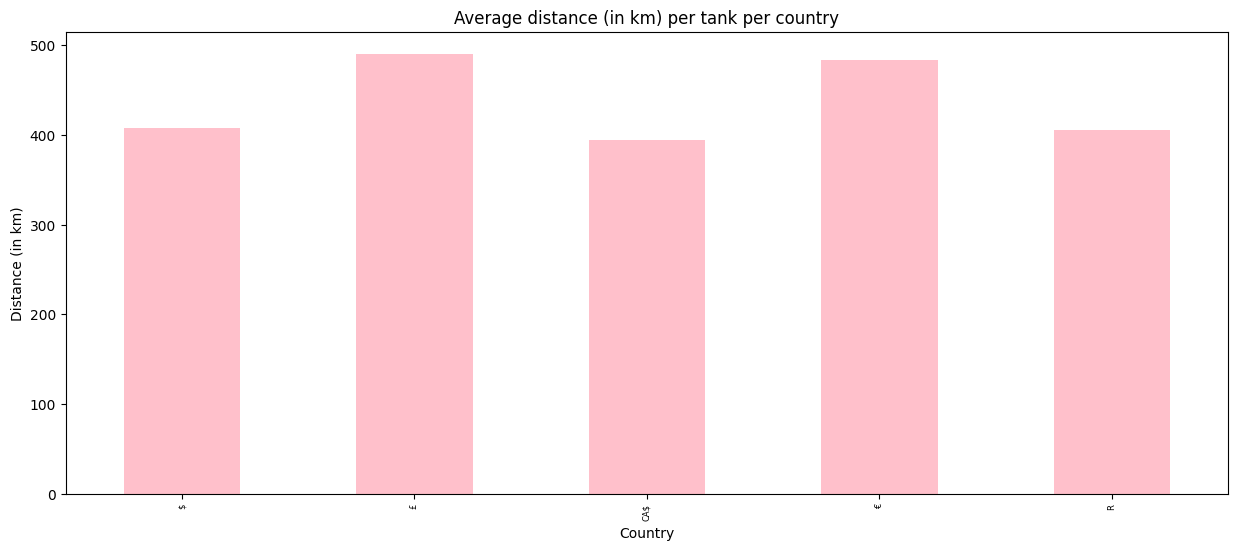

In [29]:
#4.2.3

distance_per_tank= df.groupby('currency')['km_driven'].mean()
distance_per_tank= distance_per_tank.loc[top_currencies]

fig, ax = plt.subplots(figsize=(15,6))
distance_per_tank.plot(kind='bar', ax=ax, color='pink') 

ax.set_xlabel("Country")
ax.set_ylabel("Distance (in km)")
ax.set_title("Average distance (in km) per tank per country")
ax.tick_params(axis='x', labelsize=6)

plt.show()


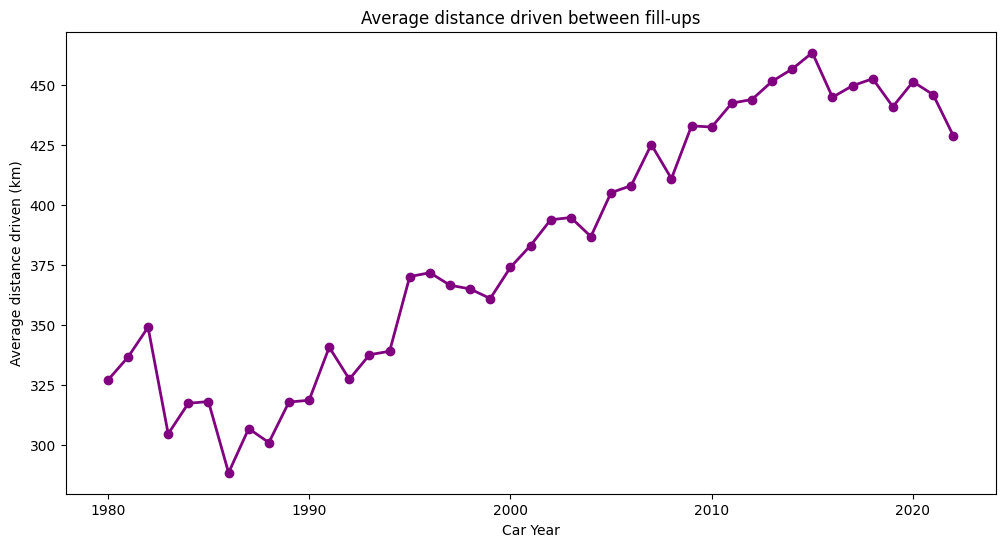

In [30]:
#4.2.4
df_clean = df.dropna(subset=['car_year', 'km_driven'])
df_clean = df_clean[(df_clean['car_year'] >= 1980) & (df_clean['car_year'] <= 2024)]
yearly_avg = df_clean.groupby('car_year')['km_driven'].mean().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(yearly_avg['car_year'], yearly_avg['km_driven'], 
         marker='o', linewidth=2, markersize=6, color='purple')

plt.xlabel('Car Year')
plt.ylabel('Average distance driven (km)')
plt.title('Average distance driven between fill-ups')
plt.show()


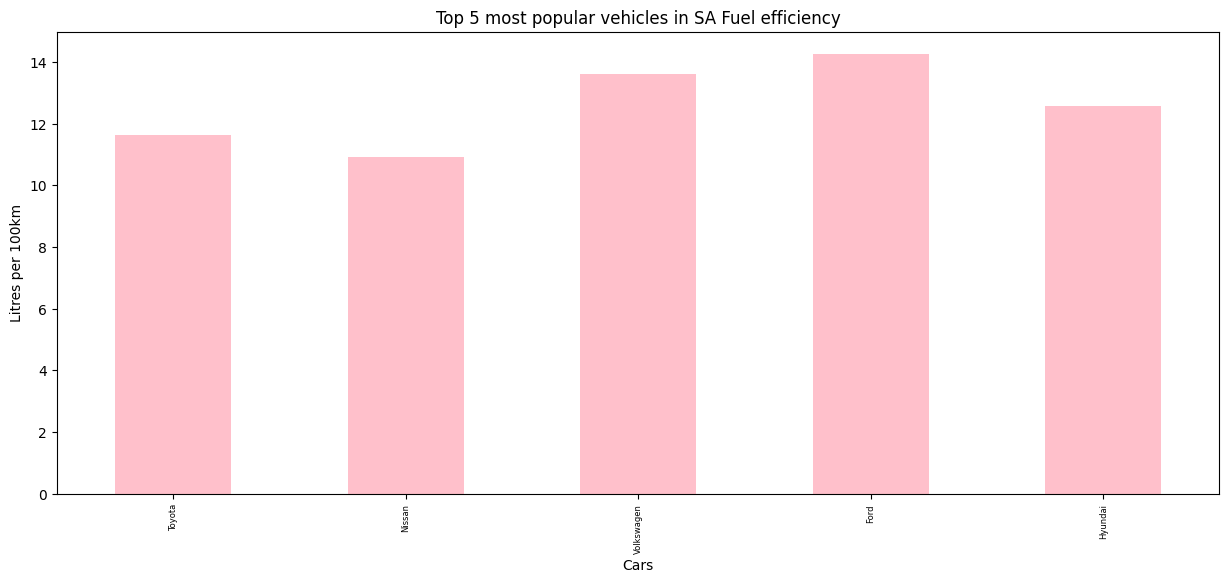

In [31]:
#4.2.5

SA_cars= df[df['currency'] == 'R']
counts=SA_cars.groupby('car_make').size()
top_5= counts.nlargest(5).index
fuel_efficiency= SA_cars.groupby('car_make')['litres_per_100km'].mean().loc[top_5]

fig, ax= plt.subplots(figsize=(15,6))
fuel_efficiency.plot(kind='bar', ax=ax, color='pink') 

ax.set_xlabel("Cars")
ax.set_ylabel("Litres per 100km")
ax.set_title("Top 5 most popular vehicles in SA Fuel efficiency")
ax.tick_params(axis='x', labelsize=6)

plt.show()


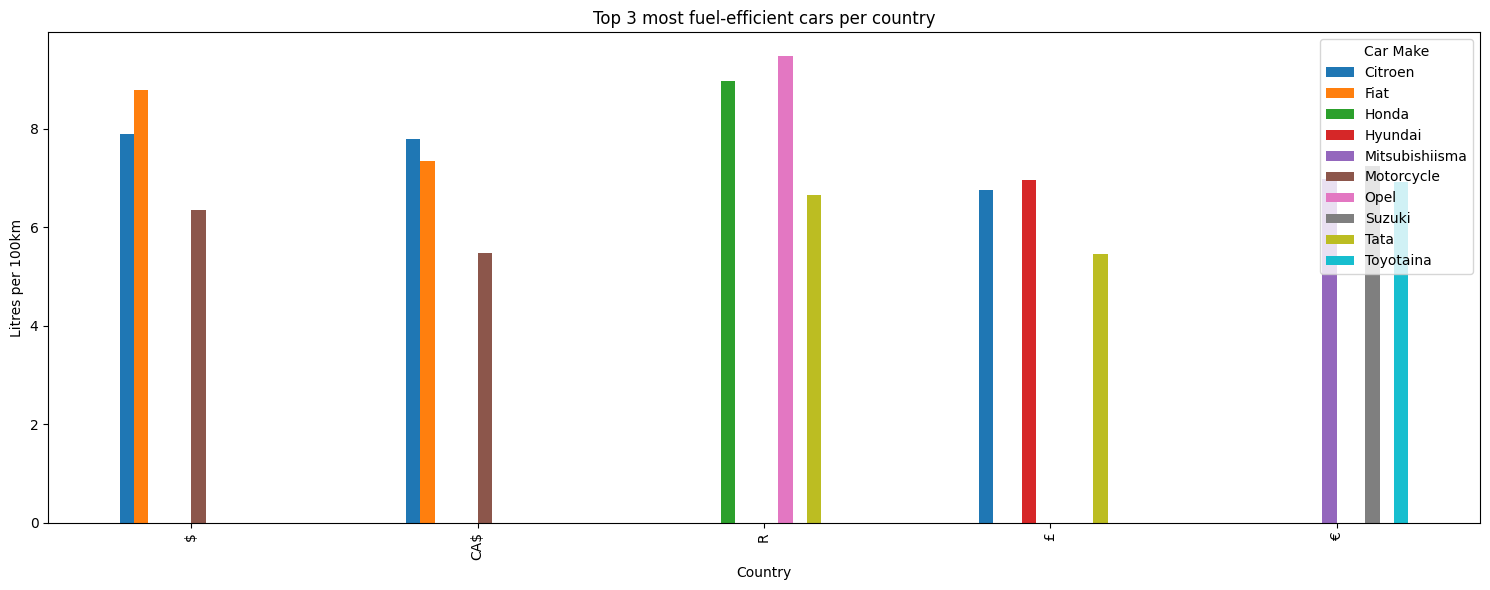

In [32]:
#4.2.6

top_countries = df[df['currency'].isin(top_currencies)]
fuel_efficiency_avg = top_countries.groupby(['currency', 'car_make'])['litres_per_100km'].mean().reset_index()
sorted_fuel_efficiency = fuel_efficiency_avg.sort_values(['currency', 'litres_per_100km'], ascending=[True, True])
top_cars_per_country = sorted_fuel_efficiency.groupby('currency').head(3)

pivot = top_cars_per_country.pivot(index='currency', columns='car_make', values='litres_per_100km')
fig, ax = plt.subplots(figsize=(15,6))
pivot.plot(kind='bar', ax=ax, width=0.5)

ax.set_xlabel("Country")
ax.set_ylabel("Litres per 100km")
ax.set_title("Top 3 most fuel-efficient cars per country")
ax.tick_params(axis='x', labelsize=10)
plt.legend(title='Car Make')
plt.tight_layout()
plt.show()


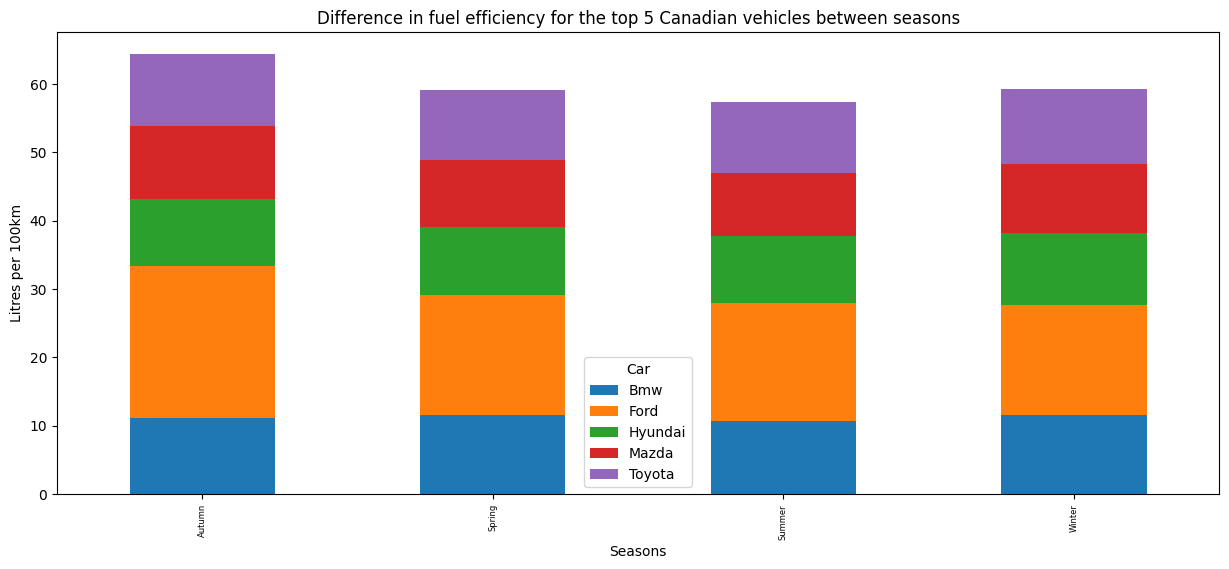

In [33]:
#4.2.7

def get_season(month):
    if month==12 or month== 1 or month == 2:
        return "Winter"
    elif month== 3 or month == 4 or month== 5:
        return "Spring"
    elif month == 6 or month==7 or month == 8:
        return "Summer"
    else:
        return "Autumn"

df["date_fueled_month"] = pd.to_datetime(df["date_fueled"])
df["season"] = df["date_fueled_month"].dt.month.map(get_season)

Can_cars= df[df['currency'] == 'CA$']
counts=Can_cars.groupby('car_make').size()
top_5= counts.nlargest(5).index

season_grouped = (Can_cars[Can_cars['car_make'].isin(top_5)].groupby(['season', 'car_make'])['litres_per_100km'].mean())

season_efficiency = season_grouped.unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(15,6))
season_efficiency.plot(kind='bar', stacked=True, ax=ax) 

ax.set_xlabel("Seasons")
ax.set_ylabel("Litres per 100km")
ax.set_title("Difference in fuel efficiency for the top 5 Canadian vehicles between seasons")
ax.tick_params(axis='x', labelsize=6)
ax.legend(title="Car")

plt.show()

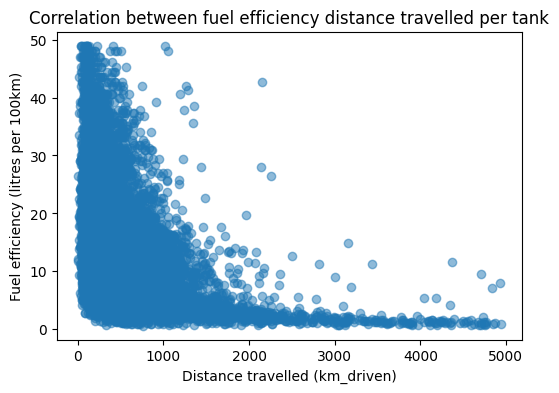

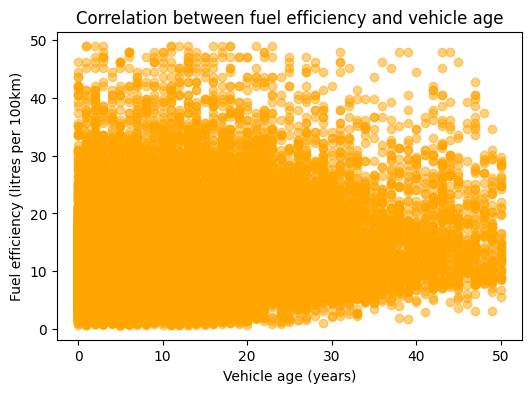

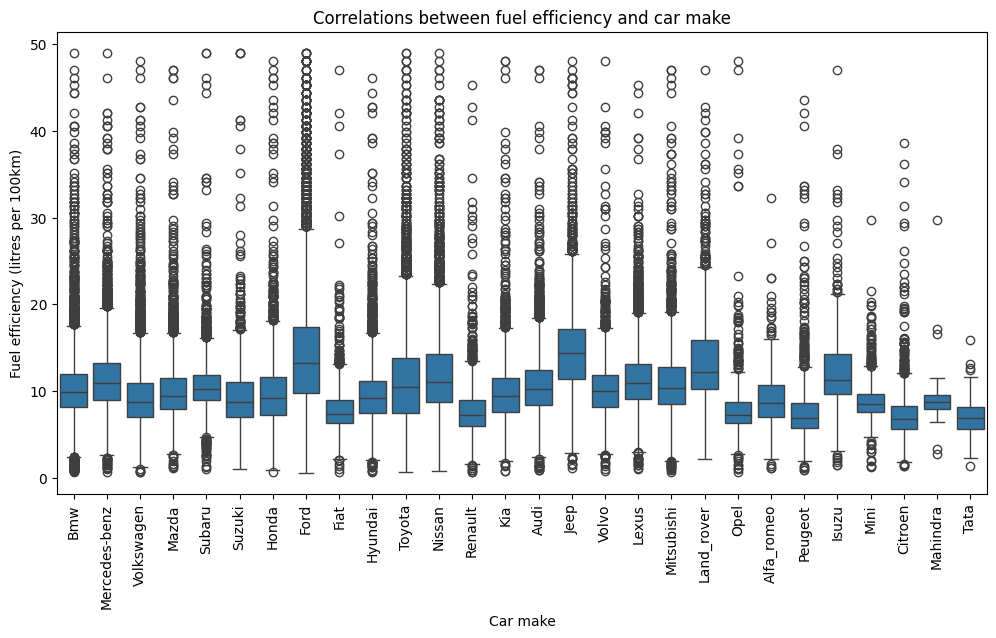

In [34]:
#4.2.8


df_clean = df.dropna(subset=['age', 'km_driven', 'litres_per_100km', 'car_year'])
df_clean = df_clean[(df_clean['age'] >= 0) & (df_clean['age'] <= 50)]
df_clean = df_clean[(df_clean['km_driven'] >= 0) & (df_clean['km_driven'] <= 5000)]
df_clean = df_clean[(df_clean['litres_per_100km'] >= 0) & (df_clean['litres_per_100km'] <= 50)]


plt.figure(figsize=(6,4))
plt.scatter(df_clean['km_driven'], df_clean['litres_per_100km'], alpha=0.5)
plt.xlabel("Distance travelled (km_driven)")
plt.ylabel("Fuel efficiency (litres per 100km)")
plt.title("Correlation between fuel efficiency distance travelled per tank")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df_clean['age'], df_clean['litres_per_100km'], alpha=0.5, color="orange")
plt.xlabel("Vehicle age (years)")
plt.ylabel("Fuel efficiency (litres per 100km)")
plt.title("Correlation between fuel efficiency and vehicle age")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="car_make", y="litres_per_100km", data=df_clean)
plt.xticks(rotation=90)
plt.xlabel("Car make")
plt.ylabel("Fuel efficiency (litres per 100km)")
plt.title("Correlations between fuel efficiency and car make")
plt.show()

In [44]:
#https://www.geeksforgeeks.org/machine-learning/random-forest-regression-in-python/

# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor

data = df.copy() 

data_clean = data.dropna()

other_features = data_clean[["car_make","car_year", "season","year_fueled", "odometer", "age", "km_driven", "litres_filled", "cost_per_liter_rand"]]
fuel_efficiency_feature = data_clean["litres_per_100km"].values


categorical = other_features.select_dtypes(include=['object']).apply(lambda col: LabelEncoder().fit_transform(col))
numerical = other_features.select_dtypes(exclude=['object'])
features = pd.concat([pd.DataFrame(numerical), categorical], axis=1).values

regressor = RandomForestRegressor(n_estimators=100, random_state=0)

other_features_train, other_features_test, fuel_efficiency_feature_train, fuel_efficiency_feature_test = train_test_split(
    features, fuel_efficiency_feature, test_size=0.2, random_state=42
)

regressor.fit(other_features_train, fuel_efficiency_feature_train)
predictions = regressor.predict(other_features_test)

feature_names = list(other_features.columns)
importances = regressor.feature_importances_
sorted_features = importances.argsort()[::-1]

print("Most important variables:")
for i in sorted_features:
    print(f"{feature_names[i]}: {importances[i]:.4f}")



Most important variables:
odometer: 0.7744
age: 0.1753
car_make: 0.0122
season: 0.0105
km_driven: 0.0103
car_year: 0.0056
year_fueled: 0.0049
litres_filled: 0.0041
cost_per_liter_rand: 0.0027


In [36]:
## 4.3 Fuel Usage in SA
# 4.3.1

sa_df = df[df["currency"] == "R"].copy()

print("Total SA records:", len(sa_df))
sa_df.head()


Total SA records: 9621


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,...,litres_filled,km_driven,litres_per_100km,day,year_fueled,age,cost_per_gallon_rand,cost_per_liter_rand,date_fueled_month,season
10,2020-11-15,2020-11-15,102001.0,9.883,RON16.69,RON164.98,38.0,375.5540,https://www.somewebsite.com/suzuki/s-cross/201...,R,...,37.411207,604.394074,6.189870,2020-11-15,2020,6.0,16.69,4.409034,2020-11-15,Autumn
53,2022-02-13,2022-02-13,115940.0,10.472,R$22.71,R$237.80,18.1,189.5432,https://www.somewebsite.com/hyundai/i30/2012/5...,R,...,39.640814,305.039453,12.995307,2022-02-13,2022,10.0,22.71,5.999350,2022-02-13,Winter
64,2021-08-21,2021-08-21,90677.0,13.209,RUB165.04,"RUB2,180.00",3.9,51.5151,https://www.somewebsite.com/lexus/gx460/2010/1...,R,...,50.001481,82.905311,60.311553,2021-08-21,2021,11.0,165.04,43.598976,2021-08-21,Summer
83,2017-04-17,2017-04-17,8851.0,10.567,"Rp35,772","Rp378,000",15.6,164.8452,https://www.somewebsite.com/mercedes-benz/b-cl...,R,...,40.000427,265.291974,15.077888,2017-04-17,2017,4.0,35772.00,9449.967111,2017-04-17,Spring
90,2021-01-16,2021-01-16,46607.0,14.352,RM8.14,RM116.81,31.1,446.3472,https://www.somewebsite.com/mercedes-benz/e300...,R,...,54.328204,718.324403,7.563185,2021-01-16,2021,6.0,8.14,2.150362,2021-01-16,Winter


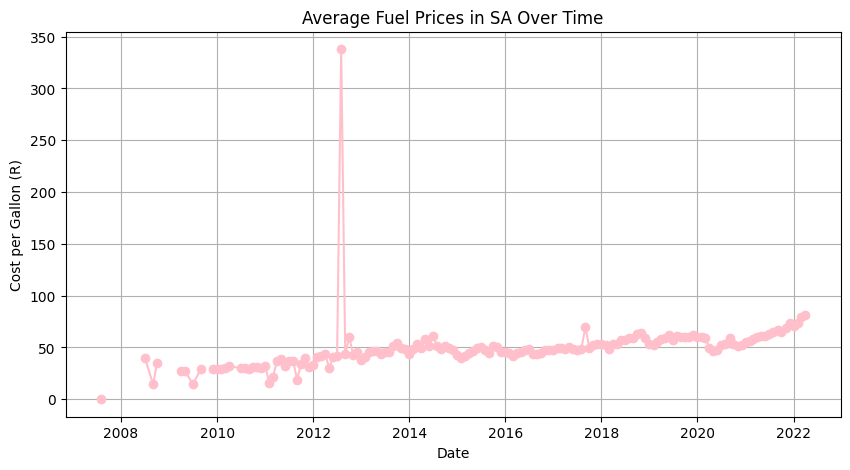

In [37]:
# 4.3.2

sa_df["cost_per_gallon"] = (
    sa_df["cost_per_gallon"]
    .astype(str)
    .str.replace("R", "", regex=False)  
    .str.replace(",", "", regex=False)  
)

sa_df["cost_per_gallon"] = pd.to_numeric(sa_df["cost_per_gallon"], errors="coerce")

price_time = (
    sa_df.groupby(sa_df["date_fueled"].dt.to_period("M"))["cost_per_gallon"]
    .mean()
    .reset_index()
)
price_time["date_fueled"] = price_time["date_fueled"].dt.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(price_time["date_fueled"], price_time["cost_per_gallon"], marker="o", color="pink")
plt.title("Average Fuel Prices in SA Over Time")
plt.xlabel("Date")
plt.ylabel("Cost per Gallon (R)")
plt.grid(True)
plt.show()


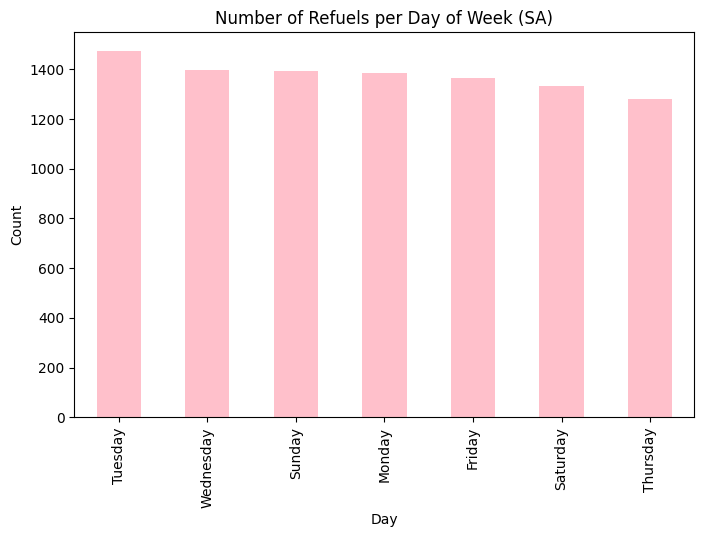

In [38]:
# 4.3.3

sa_df["day_of_week"] = sa_df["date_fueled"].dt.day_name()

tuesday_counts = sa_df["day_of_week"].value_counts()

plt.figure(figsize=(8,5))
tuesday_counts.plot(kind="bar", color="pink")
plt.title("Number of Refuels per Day of Week (SA)")
plt.ylabel("Count")
plt.xlabel("Day")
plt.show()


In [39]:
# 4.3.4

sa_df["year"] = sa_df["date_fueled"].dt.year
sa_df["month"] = sa_df["date_fueled"].dt.month
sa_df["day"] = sa_df["date_fueled"].dt.day


first_days = sa_df.groupby(["year","month"])["date_fueled"].min().reset_index()


first_tue_wed = sa_df[
    (sa_df["day_of_week"].isin(["Tuesday","Wednesday"])) &
    (sa_df.groupby(["year","month"])["day"].transform("min") == sa_df["day"])
]

first_tue_wed.head()


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,...,day,year_fueled,age,cost_per_gallon_rand,cost_per_liter_rand,date_fueled_month,season,day_of_week,year,month
871,2017-08-01,2017-08-01,18270.0,7.018,43.80,R307.36,18.3,128.4294,https://www.somewebsite.com/toyota/hilux/2012/...,R,...,1,2017,5.0,43.80,11.570741,2017-08-01,Summer,Tuesday,2017,8
4142,2016-06-01,2016-06-01,8100.0,32.240,47.85,"R1,542.62",20.6,664.1440,https://www.somewebsite.com/toyota/land_cruise...,R,...,1,2016,1.0,47.85,12.640639,2016-06-01,Summer,Wednesday,2016,6
4521,2010-03-02,2016-08-31,32089.0,15.380,NaN,RM119.35,25.6,393.7280,https://www.somewebsite.com/bmw/523i/2008/472973,R,...,2,2010,2.0,7.76,2.049976,2010-03-02,Spring,Tuesday,2010,3
7050,2021-06-01,2021-06-01,47414.0,10.762,NaN,R$260.33,22.6,243.2212,https://www.somewebsite.com/mitsubishi/asx/201...,R,...,1,2021,6.0,24.19,6.390325,2021-06-01,Summer,Tuesday,2021,6
7454,2020-12-01,2020-12-01,45891.0,9.410,55.23,R519.70,18.2,171.2620,https://www.somewebsite.com/suzuki/jimmy/2015/...,R,...,1,2020,5.0,55.23,14.590229,2020-12-01,Winter,Tuesday,2020,12


In [40]:
# 4.3.5

price_time["next_price"] = price_time["cost_per_gallon"].shift(-1)
price_time["price_change"] = price_time["next_price"] - price_time["cost_per_gallon"]


first_tue_wed = first_tue_wed.merge(price_time, on="date_fueled", how="left")


first_tue_wed["price_trend"] = first_tue_wed["price_change"].apply(
    lambda x: "Up" if x>0 else ("Down" if x<0 else "Same")
)

first_tue_wed[["date_fueled","day_of_week","price_trend"]].head()


,date_fueled,day_of_week,price_trend
0,2017-08-01,Tuesday,Up
1,2016-06-01,Wednesday,Up
2,2010-03-02,Tuesday,Same
3,2021-06-01,Tuesday,Up
4,2020-12-01,Tuesday,Up


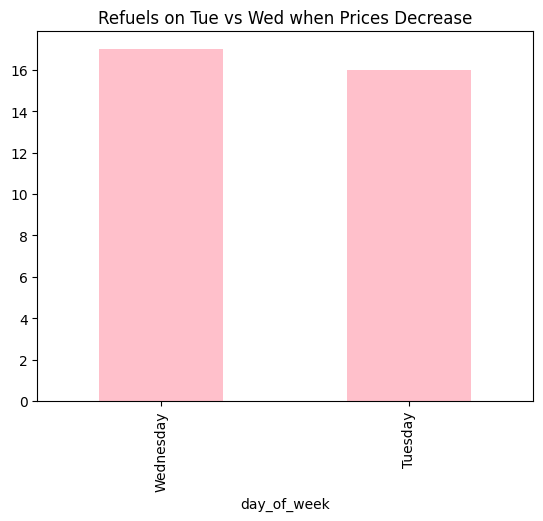

In [41]:
# 4.3.6

down_trend = first_tue_wed[first_tue_wed["price_trend"]=="Down"]

wed_vs_tue = down_trend["day_of_week"].value_counts()
wed_vs_tue.plot(kind="bar", title="Refuels on Tue vs Wed when Prices Decrease", color="pink")
plt.show()


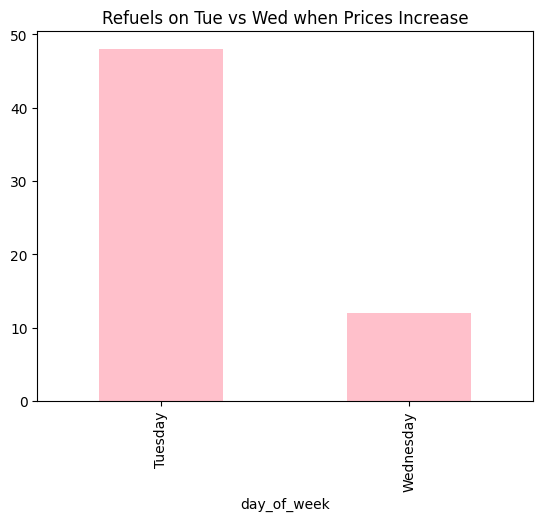

In [42]:
# 4.3.7

up_trend = first_tue_wed[first_tue_wed["price_trend"]=="Up"]

tue_vs_wed = up_trend["day_of_week"].value_counts()
tue_vs_wed.plot(kind="bar", title="Refuels on Tue vs Wed when Prices Increase",color="pink")
plt.show()